$\Delta u + k^2(1+q) u = f $ in $\Omega = [0,1]^2$    
$u = 0 $ on $\partial \Omega$

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
k = 1   # wavenumber
N = 100 # 格点数
h = 1/N # 间隔

In [3]:
def q_gen_example(N):
    q = np.zeros((N+1,N+1))
    q_value = 0.02
    x1,x2,x3,y1,y2,y3,y4 = 0.2,0.4,0.7,0.2,0.3,0.6,0.7
    q[int(x1*N):int(x2*N),int(y1*N):int(y4*N)] = q_value
    q[int(x2*N):int(x3*N),int(y2*N):int(y3*N)] = q_value
    return q
def q_generation(N,method = 1):
    if method == 1:
        return q_gen_example(N)
    print('method error')
q = q_generation(N)

<AxesSubplot:>

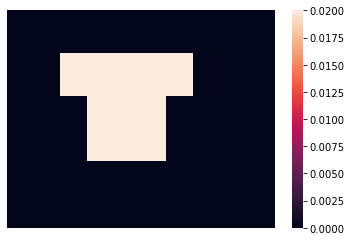

In [4]:
sns.heatmap(q, xticklabels=False, yticklabels=False)

$u = \sin(x\pi)\sin(y\pi)$  
$f = \Delta u + (1+q) u = (1+q-2\pi^2)u$

In [5]:
def u_gen(N):
    u = np.zeros((N+1,N+1))
    for i in range(1,N):
        for j in range(1,N):
            u[i,j] = np.sin(i*np.pi/N)*np.sin(j*np.pi/N)
    return u

u_truth = u_gen(N)

<AxesSubplot:>

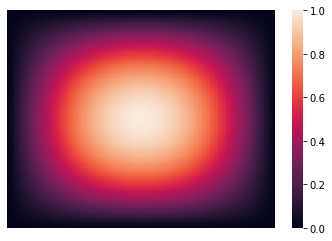

In [6]:
sns.heatmap(u_truth, xticklabels=False, yticklabels=False)

In [7]:
def f_gen_1(N,q,u):
    return (1+q[1:-1,1:-1]-2*np.pi*np.pi)*u[1:-1,1:-1]

f = f_gen_1(N,q,u_truth)

<AxesSubplot:>

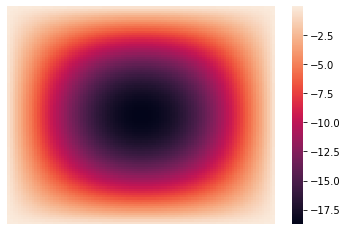

In [8]:
sns.heatmap(f, xticklabels=False, yticklabels=False)

### Method1  
$u_{i,j}^{n+1} = \frac{1}{4}[(u_{i+1,j}^n +u_{i-1,j}^n +u_{i,j+1}^n +u_{i,j-1}^n )+h^2(1+q_{i,j})u_{i,j}^n - h^2 f_{i,j}]$

In [9]:
def Method_1(q,f,N,u_truth,nt = 100,u_in = np.zeros((N + 1, N + 1))):
    h = 1/N
    u = u_in
    for it in range(nt):
        uu = u.copy()
        u[1:-1, 1:-1] = (
            uu[1:-1, 2:] + uu[1:-1, :-2] + uu[2:, 1:-1] + uu[:-2, 1:-1] + h * h *
            (1 + q[1:-1, 1:-1]) * uu[1:-1, 1:-1] - h * h * f) / 4
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
    err = np.abs(u - u_truth).max()
#     err1 = np.linalg.norm(np.abs(uu-u),ord = 2)/(N-1)**2
#     err2 = N*N*(u[1:-1, 2:] + u[1:-1, :-2] + u[2:, 1:-1] - 4 * u[1:-1, 1:-1])+ u[:-2, 1:-1] + (
#     1 + q[1:-1, 1:-1]) * u[1:-1, 1:-1] -f 
    return u,err

### Method2
$u_{i,j}^{n+1} = [(u_{i+1,j}^n +u_{i-1,j}^n +u_{i,j+1}^n +u_{i,j-1}^n ) - h^2 f_{i,j}]/[4-h^2(1+q_{i,j})]$

In [10]:
def Method_2(q,f,N,u_truth,nt = 100,u_in = np.zeros((N + 1, N + 1))):
    h = 1/N
    u = u_in
    for it in range(nt):
        uu = u.copy()
        u[1:-1, 1:-1] = (
            uu[1:-1, 2:] + uu[1:-1, :-2] + uu[2:, 1:-1] + uu[:-2, 1:-1] - h * h * f) / (4-h*h*(1+q[1:-1,1:-1]))
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
    err = np.abs(u - u_truth).max()
#     err1 = np.linalg.norm(np.abs(uu-u),ord = 2)/(N-1)**2
#     err2 = u[1:-1, 2:] + u[1:-1, :-2] + u[2:, 1:-1] + u[:-2, 1:-1] - h * h * (
#     1 + q[1:-1, 1:-1]) * u[1:-1, 1:-1] - h * h * f - 4 * u[1:-1, 1:-1]
    return u,err

In [11]:
def perform(method,N,q,f,u_truth,test_list= [32,64,128,256,512,1024,2048,4096,8192,16384,32768]):
    u_list,u_error = [],[]
    times = test_list[0]
    u_in = np.zeros((N+1,N+1))
    if method == 1:
        for iter in test_list:
            tmp = Method_1(q,f,N,u_truth,times,u_in)
            u_list.append(tmp[0])
            u_error.append(tmp[1])
            u_in = tmp[0]
            times = iter
    elif method == 2:
        for iter in test_list:
            tmp = Method_2(q,f,N,u_truth,times,u_in)
            u_list.append(tmp[0])
            u_error.append(tmp[1])
            u_in = tmp[0]
            times = iter
    else:
        print('method error')
        return 0 
    return u_list,u_error


[0.9851327207420113, 0.9704861064577885, 0.9418412686322427, 0.8870580010533234, 0.7868530885372794, 0.6191007614217445, 0.3832375326515023, 0.14682101901062572, 0.021490734479271856, 0.00037879451745193027, 8.647834540886912e-05]
[0.9851323443692833, 0.9704853650405111, 0.9418398303663835, 0.887055294661467, 0.7868482947889351, 0.6190932323297709, 0.38322822673280876, 0.1468138940787982, 0.02148864275128659, 0.0003787042981556743, 8.647842942433037e-05]


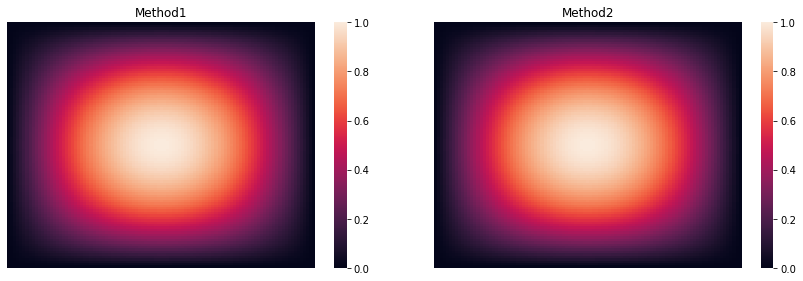

In [12]:
u1 = perform(1,N,q,f,u_truth)
u2 = perform(2,N,q,f,u_truth)
print(u1[1])
print(u2[1])
figure, ax = plt.subplots(1, 2, figsize=(12, 4))
figure.tight_layout()
ax[0].set_title("Method1")
ax[1].set_title("Method2")
plt.subplot(121)
h1 = sns.heatmap(np.array(u1[0][-1]),
                 xticklabels=False,
                 yticklabels=False)
plt.subplot(122)
h2 = sns.heatmap(np.array(u2[0][-1]),
                 xticklabels=False,
                 yticklabels=False)

<AxesSubplot:>

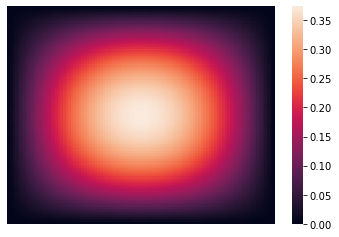

In [13]:
sns.heatmap(Method_1(q,f,N,u_truth,nt = 1000,u_in = np.zeros((N + 1, N + 1)))[0],
                 xticklabels=False,
                 yticklabels=False)

### 问题总结
* 两种方法得到的结果较为类似，需要迭代较多步数(1e4)时才能得到准确解(1e-4)$\Rightarrow$[Out]12
* N取值会影响收敛的结果，过高(N=200)或者(N=50)都不能达到很快的迭代结果，单纯求解Helmholtz方程也会有类似问题
* 迭代到一定次数之后形状不发生改变只是数值上更加接近$\Rightarrow$[Out]13
* q的取值(正数)一定范围内不会影响迭代速度($|q|_{\infty} = 0.1,1,5$)
* k的取值会很大程度上影响迭代结果，单纯求解Helmholtz方程也会有类似问题  

### 后续规划
* 后续采取多层网格法加速  
* 后续尝试MUMPS方法求解